<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from pyndamics3 import Simulation,Stochastic_Simulation

pyndamics3  version  0.0.23


In [ ]:
from pyndamics3.mcmc import *

In [ ]:
flut = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
flui = array([3,8,26,76,225,298,258,233,189,128,68,29,14,4])

In [ ]:
β=1.9732213241997467
γ=0.47521873806558335

β=.5
γ=1

So=763
Io=1

stoch_sim=Stochastic_Simulation()
stoch_sim.add("-S+I",'β*S*I/N',S=So,I=Io)
stoch_sim.add("-I +R",'γ*I',R=0)
stoch_sim.add("N=S+I+R")
stoch_sim.params(β=β,γ=γ)
stoch_sim.add_data(t=flut,I=flui)
stoch_sim.run(20,Nsims=100)

100%|██████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 22217.95it/s]


this raises an error

In [ ]:
β=1.9732213241997467
γ=0.47521873806558335

β=.5
γ=1

So=763
Io=1

stoch_sim_err=Stochastic_Simulation()
stoch_sim_err.add("-S+I",'β*S*I/N',S=So,I=Io)
stoch_sim_err.add("-I +R",'γ*I',R=0)
stoch_sim_err.add("N=S+I+R")
stoch_sim_err.params(β=β)
stoch_sim_err.add_data(t=flut,I=flui)
stoch_sim_err.run(20,Nsims=100)

NameError: name 'γ' is not defined

In [ ]:
stoch_sim['I']

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
I=stoch_sim.components[1]

[<matplotlib.lines.Line2D>]

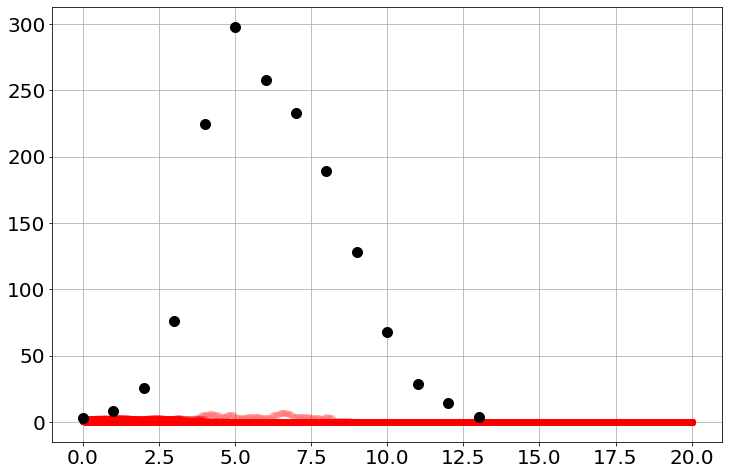

In [ ]:
for i in range(100):    
    plot(stoch_sim.t,stoch_sim.I[i],'ro',alpha=0.05)
    
plot(flut,flui,'ko',ms=10,lw=3,)

In [ ]:
print(stoch_sim.func_str)

@numba.jit
def _propensity_function(population, args):
    S,I,R = population
    β,γ = args
    
    N=S+I+R
    
    val = np.array([
        β*S*I/N,
        γ*I,
    ])
    return val


[<matplotlib.lines.Line2D>]

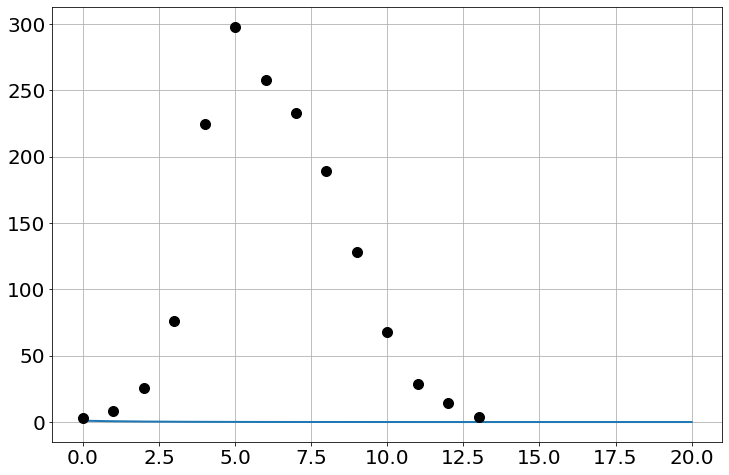

In [ ]:
dynamic_sim=sim=Simulation()
sim.add("N=S+I+R")
sim.add("S'=-β*S*I/N",So)
sim.add("I'=+β*S*I/N-γ*I",Io)
sim.add("R'=+γ*I",0)
sim.params(β=β,γ=γ)
sim.add_data(t=flut,I=flui)
sim.run(20)

plot(sim.t,sim.I)
plot(flut,flui,'ko',ms=10,lw=3,)

In [ ]:
stoch_sim.I[i]

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
stoch_model=MCMCModel(stoch_sim,β=Uniform(0,5),
               γ=Uniform(0,5))

Sampling Prior...
Done.
0.34 s
Running MCMC 1/3...
Done.
33.00 s
Running MCMC 2/3...
Done.
46.03 s
Running MCMC 3/3...
Done.
44.88 s


<Figure size 864x576 with 0 Axes>

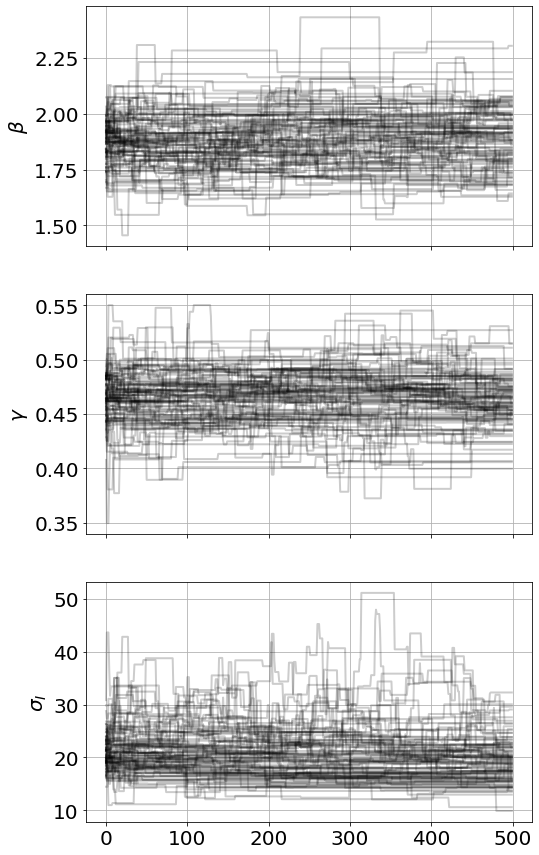

In [ ]:
number_of_iterations=500
stoch_model.run_mcmc(number_of_iterations,repeat=3)

stoch_model.plot_chains()

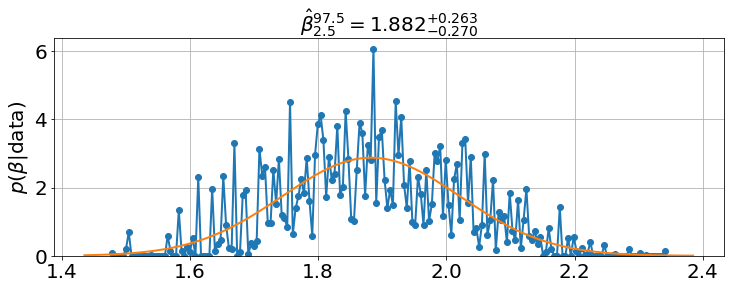

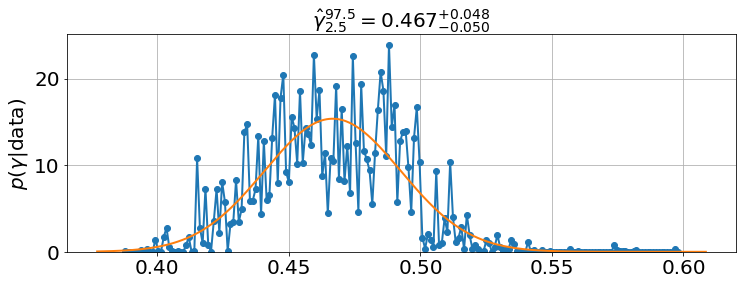

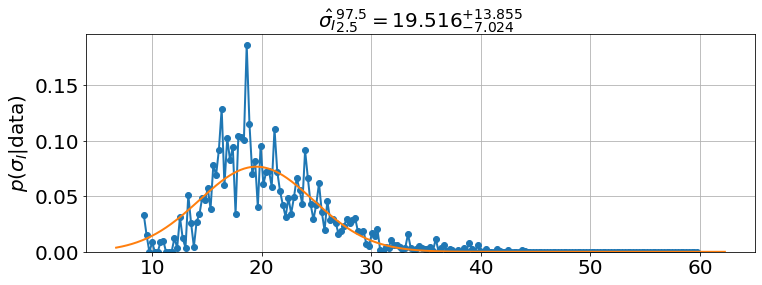

In [ ]:
stoch_model.plot_distributions()

In [ ]:
stoch_sim._params['β']

1.8940266095795844

In [ ]:
stoch_sim.run(20,Nsims=100)

100%|███████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1284.31it/s]


[<matplotlib.lines.Line2D>]

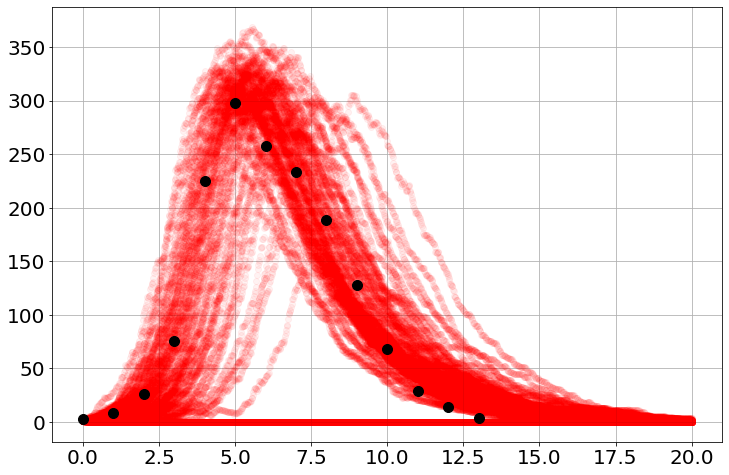

In [ ]:
for i in range(100):    
    plot(stoch_sim.t,stoch_sim.I[i],'ro',alpha=0.05)
    
plot(flut,flui,'ko',ms=10,lw=3,)

## debug with flu data

In [ ]:
from pyndamics3 import Simulation,Stochastic_Simulation

In [ ]:
flut = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
flui = array([3,8,26,76,225,298,258,233,189,128,68,29,14,4])

In [ ]:
flui=array([0,72,112,145,194])
flut=array([1,2,3,4,5])

In [ ]:
β=1.9732213241997467
γ=0.47521873806558335

β=.5
γ=1

So=763
Io=1

stoch_sim=Stochastic_Simulation()
stoch_sim.add("-S+I",'β*S*E/N',S=So,I=Io)
stoch_sim.add("-E+I",'ζ*S*I',E=0)
stoch_sim.add("-I +R",'γ*I',R=0)
stoch_sim.add("N=S+I+R")
stoch_sim.params(β=β,γ=γ,ζ=.1)
stoch_sim.add_data(t=flut,I=flui)
stoch_sim.run(20,Nsims=100)

  0%|                                                                       | 0/100 [00:00<?, ?it/s]

## Debug with vampire data

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from pyndamics3 import Simulation,Stochastic_Simulation

In [ ]:
tbt=array([0,72,112,145,194])
tbv=array([1,2,3,4,5])

In [ ]:
So=100
Vo=1
Eo=0
t_max=1.1*tbt.max()
β=0.5
γ=0.5
ζ=0.5
δ=0.5

stoch_sim=sim=Stochastic_Simulation()
sim.add("-S+E",'β*S*V/N',S=So,V=Vo)
sim.add("-E+V",'γ*S*V',E=Eo)
sim.add("-E+X",'ζ*S*V',X=1)
sim.add("-V+R",'δ*S*V',R=0)
sim.add("N=S+E+V+X")
sim.params(β=0.03,γ=0.00047,ζ=ζ,δ=δ)
sim.add_data(t=tbt,V=tbv)
sim.run(t_max,Nsims=100)

  0%|                                                                       | 0/100 [00:00<?, ?it/s]


ValueError: 